# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


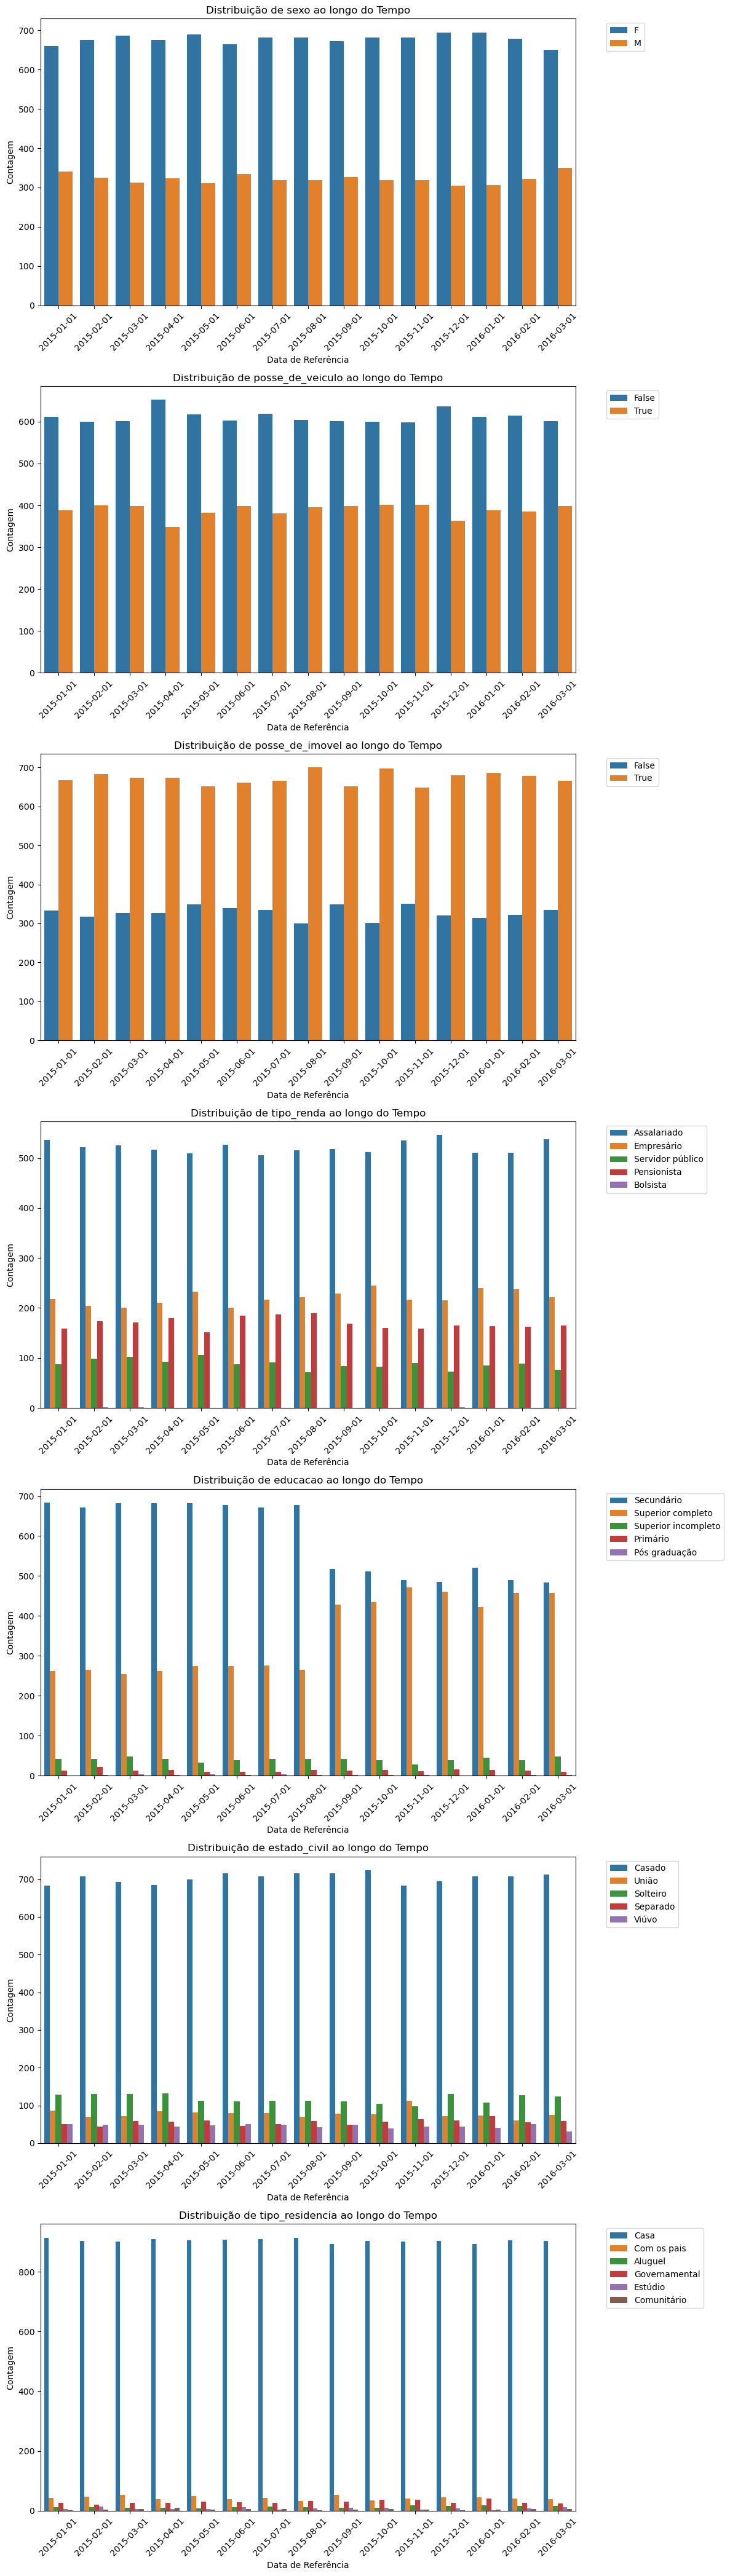

In [3]:
# Selecionar apenas as colunas relevantes
df_filtrado = df[['data_ref', 'sexo', 'posse_de_veiculo',
                  'posse_de_imovel', 'tipo_renda', 'educacao', 
                  'estado_civil', 'tipo_residencia']]

num_subplots = len(df_filtrado.columns) - 1  
cont = 1
plt.figure(figsize=(12, 6 * num_subplots))
for var in df_filtrado.columns[1:]:
    plt.subplot(num_subplots, 1, cont)
    sns.countplot(data=df_filtrado, x='data_ref', hue=var)
    plt.title(f'Distribuição de {var} ao longo do Tempo')
    plt.xlabel('Data de Referência')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    cont += 1

plt.tight_layout()
plt.show()

 - Observa-se que a variável 'educação' exibe uma considerável dispersão e desequilíbrio nos seus valores, especialmente entre os meses 8 e 9 do período analisado.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

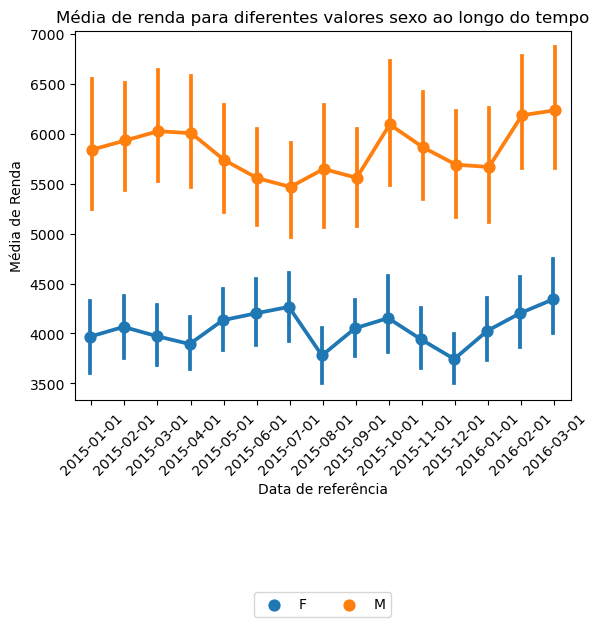

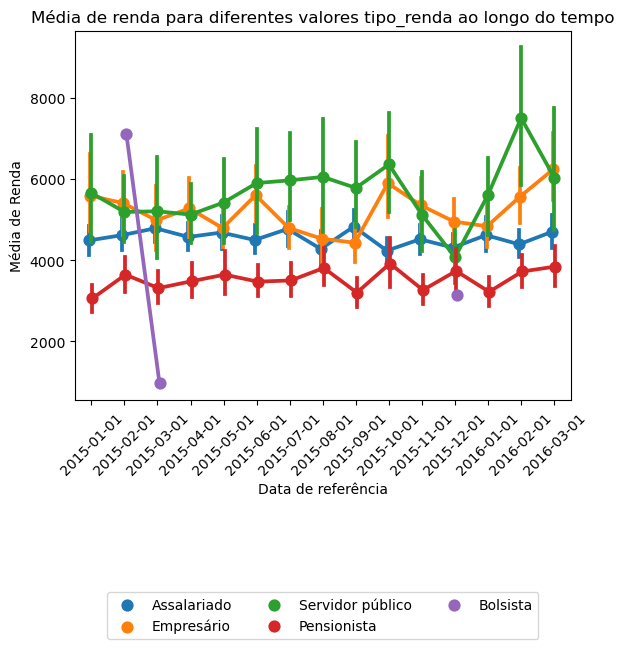

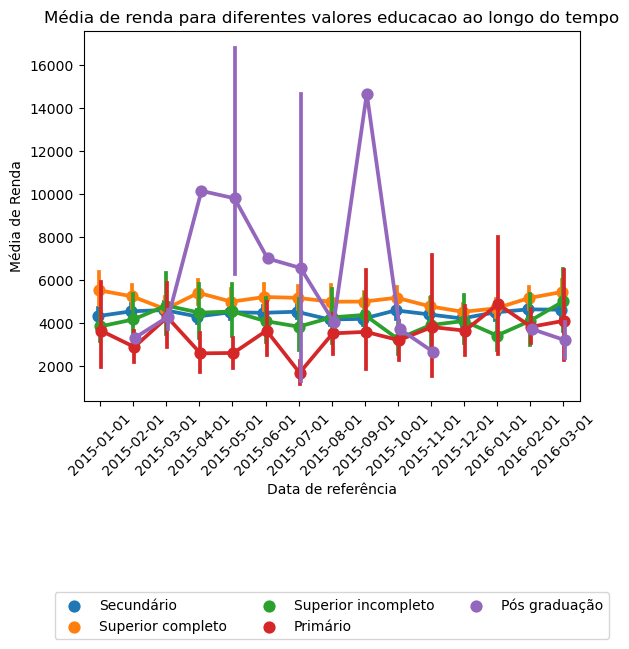

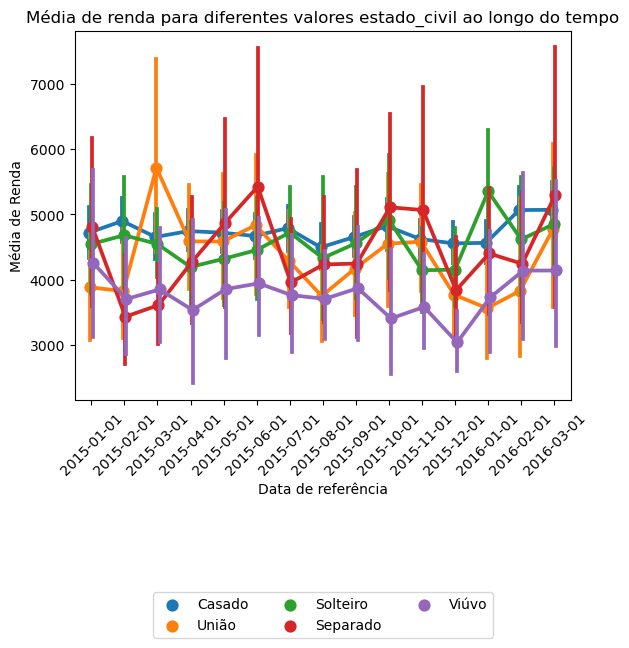

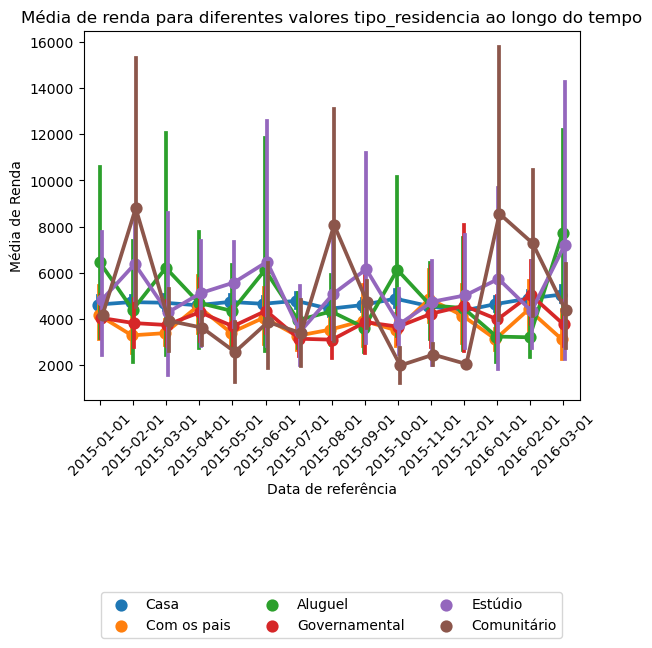

In [4]:
df_qualitativa = df.select_dtypes(include='object')
cont = 1
for col in df_qualitativa.columns[1:]:
  plt.subplot(1,1,cont)
  cont=+ 1
  sns.pointplot(x="data_ref", y="renda", hue = col,
                    data=df, dodge=True, errorbar=('ci', 95))
  plt.title(f'Média de renda para diferentes valores {col} ao longo do tempo')
  plt.xticks(rotation=45)
  plt.xlabel('Data de referência')
  plt.ylabel('Média de Renda')
  plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -.50),ncol = 3)
  plt.show()

Com base na avaliação da estabilidade ao longo do tempo, observa-se que nenhuma das variáveis apresenta estabilidade, o que significa que todas elas têm variações significativas em seus valores ao longo do período considerado. No entanto, mesmo que as variáveis não sejam estáveis ao longo do tempo, isso não impede necessariamente sua utilização em modelagem.

Cada variável qualitativa pode ser útil em modelagem se tiver uma variação significativa em seus níveis e se essa variação estiver relacionada à variável de resposta, neste caso, a renda. Portanto, mesmo que as variáveis não sejam estáveis ao longo do tempo, elas ainda podem ser relevantes para prever a renda, desde que capturem características importantes dos dados.

Em resumo, embora não haja estabilidade ao longo do tempo para as variáveis avaliadas, elas ainda podem ser úteis em modelagem se tiverem uma variação significativa em seus níveis e estiverem relacionadas à variável de interesse, a renda. Recomenda-se realizar análises mais detalhadas para determinar o impacto dessas variáveis na previsão da renda e considerar outras variáveis ou técnicas, se necessário, para obter resultados mais precisos.